Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
#Counting train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

#### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir_train, labels ='inferred', label_mode='int',
    validation_split=0.2, #Train test split
    subset="training",
    seed=123,
    image_size=(img_height, img_width), #image resizing to 180 x 180
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir_train, labels ='inferred', label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Listing out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

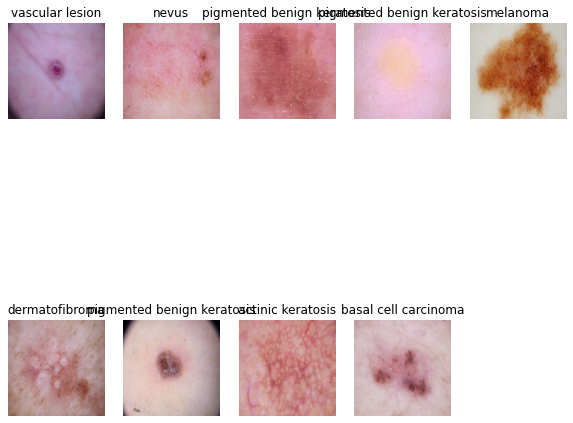

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(5, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255), #scaling to 0-1
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])


### Compile the model
Choosing an optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 269s 957ms/step - loss: 1.9668 - accuracy: 0.2701 - val_loss: 1.6307 - val_accuracy: 0.4452
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.5674 - accuracy: 0.4542 - val_loss: 1.4618 - val_accuracy: 0.5078
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4305 - accuracy: 0.4905 - val_loss: 1.4854 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3134 - accuracy: 0.5452 - val_loss: 1.4085 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.2097 - accuracy: 0.5647 - val_loss: 1.3839 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.1834 - accuracy: 0.5848 - val_loss: 1.3857 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.0854 - accuracy: 0.6116 - val_loss: 1.6632 - val_accuracy: 0.4989
Epoch 8/20

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

### Visualizing training results

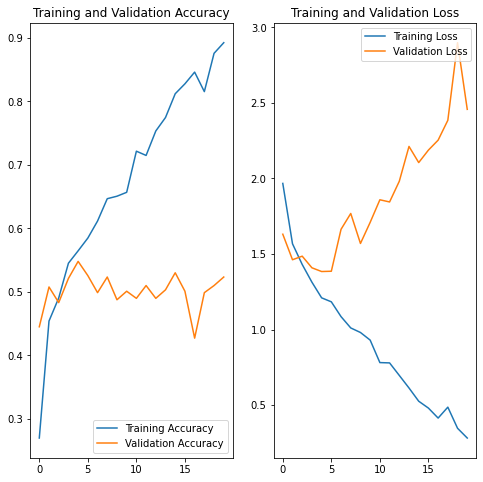

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**:
1. Above graphs shows validation accuracy stops increasing somwgere at 4th epoch. As Training accuracy only increases and not Testing it shows model is **overfitting**

Data Augmentation without augmentor liabrary

In [11]:
# One of the method to avoid Overfitting is to use data imagaes in abundance. If data is not readily available, data augmentation can be used.
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.6),
  layers.RandomContrast(0.5, seed=None)
])

visualizing how your augmentation strategy works for one instance of training image.

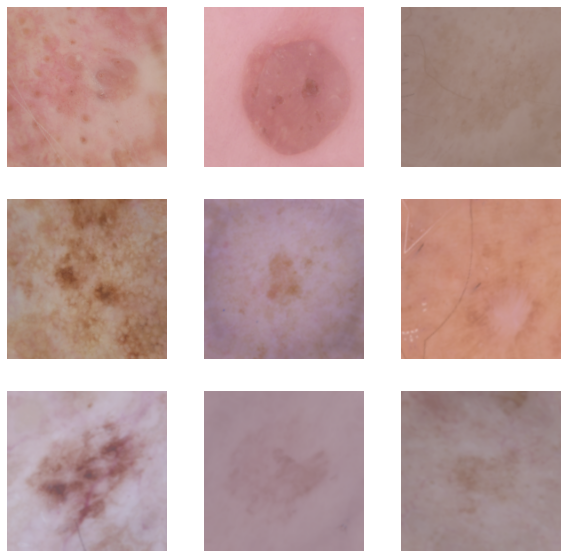

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    images = data_augmentation(images)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

### Create the 2nd model, compile and train the model


In [ ]:
##  Dropout layer has been considered after every CNN unit

model01 = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.25),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.5),
  tf.keras.layers.Dense(9)
])


### Compiling the model

In [ ]:
## Your code goes here
model01.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model01.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 66ms/step - loss: 2.1475 - accuracy: 0.2126 - val_loss: 2.0160 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 1.8553 - accuracy: 0.3315 - val_loss: 1.7552 - val_accuracy: 0.3960
Epoch 3/20
56/56 [==============================] - 3s 62ms/step - loss: 1.7640 - accuracy: 0.3622 - val_loss: 1.7422 - val_accuracy: 0.4049
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6963 - accuracy: 0.3945 - val_loss: 1.6425 - val_accuracy: 0.4049
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6511 - accuracy: 0.3973 - val_loss: 1.7059 - val_accuracy: 0.3400
Epoch 6/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6094 - accuracy: 0.4208 - val_loss: 1.5350 - val_accuracy: 0.4362
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.5577 - accuracy: 0.4358 - val_loss: 1.5052 - val_accuracy: 0.4609
Epoch 8/20
56

### Visualizing the results

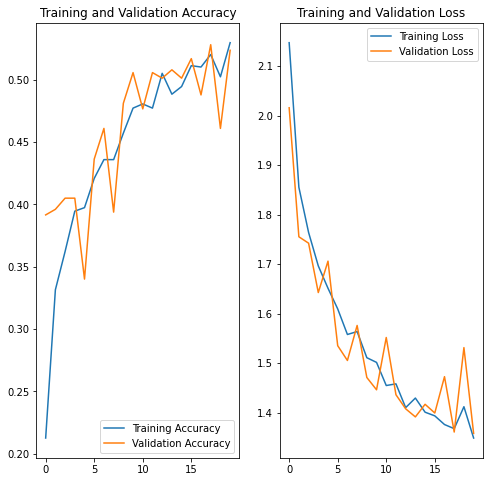

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### After using Data Augmentation & Drop Out Training accuracy reduced. Validation accuracy remains as it was. This shows the **"Overfitting"** has been eliminated. Still model peformance is average.

### Distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [13]:
import os
from glob import glob
path_list_ori = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [ ]:
## Your code goes here.
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

In [ ]:
dataframe_dict = dict(zip(path_list_ori, lesion_list))


In [ ]:
df1 = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df1.Label.value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

**Findings**:
####  **seborrheic keratosis**  has the least number of samples
####  **Pigmented benign keratosis** and **Melanoma** dominate the data in terms proportionate number of samples?

### Rectify the class imbalance


In [15]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [16]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +"/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F19DA2F8E50>: 100%|██████████| 500/500 [00:23<00:00, 21.34 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F19DA2B02B0>: 100%|██████████| 500/500 [00:21<00:00, 23.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F19DA2BDAF0>: 100%|██████████| 500/500 [00:18<00:00, 27.57 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F19DA2580A0>: 100%|██████████| 500/500 [01:32<00:00,  5.43 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F19DA20C0A0>: 100%|██████████| 500/500 [01:23<00:00,  6.01 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F19DA20ED60>: 100%|██████████| 500/500 [00:18<00:00, 27.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F19DA26C6D0>: 100%|██████████| 500/500 [00:41<00:00, 11.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F19DA30F0A0>: 100%|██████████| 500/500 [00:17<00:00, 27.91 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F19DA324DC0>: 100%|██████████| 500/500 [00:18<00:00, 26.98 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [17]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import os
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [19]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [20]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [21]:
original_df = pd.DataFrame()
new_df= pd.DataFrame()
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [22]:
new_df['Label'].value_counts()

actinic keratosis             500
squamous cell carcinoma       500
nevus                         500
basal cell carcinoma          500
melanoma                      500
pigmented benign keratosis    500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [23]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [24]:
data_dir_train_aug=data_dir_train
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Total images **6739** = **2239** (original images) +  **500 * 9**(newly created images) 

####  Creating a validation dataset

In [25]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create 3rd model 

In [31]:
model02 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0),
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])


#### Compile your model (Choose optimizer and loss function appropriately)

In [32]:
model02.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

####  Training 3rd model

In [33]:
## using 30 epochs.
history = model02.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=30
)

Epoch 1/30
169/169 [==============================] - 34s 195ms/step - loss: 1.8226 - accuracy: 0.3032 - val_loss: 1.6115 - val_accuracy: 0.3667
Epoch 2/30
169/169 [==============================] - 33s 192ms/step - loss: 1.4953 - accuracy: 0.4284 - val_loss: 1.4708 - val_accuracy: 0.4499
Epoch 3/30
169/169 [==============================] - 33s 187ms/step - loss: 1.3951 - accuracy: 0.4705 - val_loss: 1.3280 - val_accuracy: 0.4967
Epoch 4/30
169/169 [==============================] - 32s 186ms/step - loss: 1.2761 - accuracy: 0.5193 - val_loss: 1.1749 - val_accuracy: 0.5553
Epoch 5/30
169/169 [==============================] - 32s 183ms/step - loss: 1.1111 - accuracy: 0.5809 - val_loss: 1.2354 - val_accuracy: 0.5442
Epoch 6/30
169/169 [==============================] - 32s 182ms/step - loss: 0.9525 - accuracy: 0.6463 - val_loss: 0.9845 - val_accuracy: 0.6422
Epoch 7/30
169/169 [==============================] - 32s 183ms/step - loss: 0.8089 - accuracy: 0.7073 - val_loss: 1.2772 - val_ac

In [34]:
model02.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 64)       

#### Visualize the model results

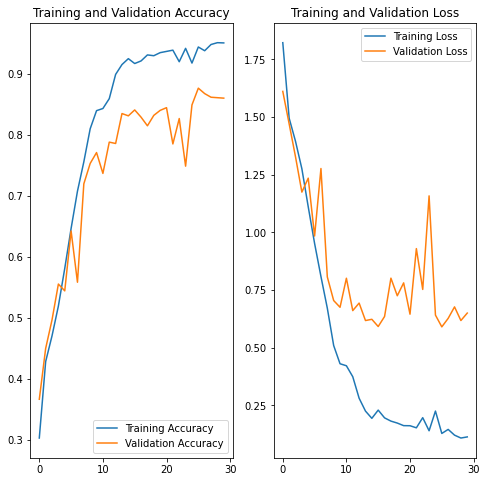

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings-Conclusion


1. Class rebalance helped to achieve overall accuracy on both training & validation set. 
2. From graph it can be seen that for this model 02 validation accuracy does not cope up with Training accuracy somewhere around 9-10 epochs. So model is still slightly overfitting. To counter this, following methods can be used.
<br>
i) Usage of droputs
<br>
ii) early stopping- model training can be stopped around 10th epoch to make model more robust and generic.
<br>

These methods were tried in same model and Overfitting was reduced with some reduction in validation accuracy (~75%). The model has not shown here again to stick with assignment flow.